P203 사람얼굴

In [7]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
people = fetch_lfw_people(min_faces_per_person=5, resize=0.7)

In [3]:
people.target_names

array(['Abdullah Gul', 'Adrien Brody', 'Ahmed Chalabi', 'Ai Sugiyama',
       'Al Gore', 'Al Sharpton', 'Alan Greenspan', 'Alastair Campbell',
       'Albert Costa', 'Alejandro Toledo', 'Ali Naimi', 'Allyson Felix',
       'Alvaro Uribe', 'Amelia Vega', 'Amelie Mauresmo', 'Ana Guevara',
       'Ana Palacio', 'Andre Agassi', 'Andy Roddick', 'Angela Bassett',
       'Angela Merkel', 'Angelina Jolie', 'Ann Veneman',
       'Anna Kournikova', 'Antonio Banderas', 'Antonio Palocci',
       'Ari Fleischer', 'Ariel Sharon', 'Arminio Fraga',
       'Arnold Schwarzenegger', 'Arnoldo Aleman', 'Ashanti',
       'Atal Bihari Vajpayee', 'Ben Affleck', 'Benazir Bhutto',
       'Benjamin Netanyahu', 'Bernard Law', 'Bertie Ahern',
       'Bill Clinton', 'Bill Frist', 'Bill Gates', 'Bill Graham',
       'Bill McBride', 'Bill Simon', 'Billy Crystal',
       'Binyamin Ben-Eliezer', 'Bob Graham', 'Bob Hope', 'Bob Stoops',
       'Boris Becker', 'Brad Johnson', 'Britney Spears', 'Bulent Ecevit',
       'Cal

In [11]:
people.target.shape, len(set(people.target_names)), people.images.shape

((5985,), 423, (5985, 87, 65))

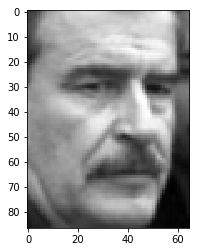

In [12]:
plt.imshow(people.images[0], cmap='gray')

In [59]:
len(set(people.target))

423

In [63]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [64]:
x = people.data
y = people.target
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [66]:
model = RidgeClassifier(alpha=10).fit(X_train, y_train)

C:\Users\wtime\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:165: LinAlgWarning: Ill-conditioned matrix (rcond=6.60264e-11): result may not be accurate.
  overwrite_a=False)


In [67]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.06078824315297261)

In [68]:
#오버피팅을 pca를 이용하여 다시 작업

In [69]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) #normalization
pca_x = pca.transform(people.data)
X_train, X_test, y_train, y_test = train_test_split(pca_x, y)

In [71]:
model = RidgeClassifier(alpha=10).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.2375222816399287, 0.1963927855711423)

In [43]:
pca_image = np.reshape(pca_x, [-1, 10, 10])
pca_image.shape

(5985, 10, 10)

In [14]:
# 87 * 65 개 이상의 명암을 주성분 10 * 10 개로 변환해서 시각화
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=10*10, whiten=True).fit(people.data) #normalization

In [29]:
pca_x = pca.transform(people.data)

In [51]:
people.data.shape, pca_x.shape

((5985, 5655), (5985, 100))

In [52]:
img = pca.components_.reshape([-1, 87, 65])
img.shape

(100, 87, 65)

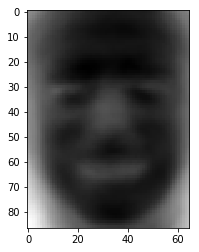

In [53]:
plt.imshow(img[0], cmap='gray')

In [54]:
pca.components_

array([[-0.00611216, -0.0064747 , -0.0068157 , ..., -0.00339692,
        -0.00277968, -0.00220641],
       [-0.01258192, -0.01247189, -0.01253607, ...,  0.02249239,
         0.02127793,  0.02003042],
       [ 0.02712854,  0.02778674,  0.02874434, ...,  0.0170952 ,
         0.0163148 ,  0.01546028],
       ...,
       [-0.00824395, -0.00634913, -0.00293922, ..., -0.01123583,
        -0.01687897, -0.01670214],
       [ 0.01019032,  0.01122128,  0.01306372, ..., -0.02815824,
        -0.04418471, -0.05024593],
       [ 0.0229031 ,  0.01963031,  0.01437208, ..., -0.02640797,
        -0.01723911, -0.00690796]], dtype=float32)

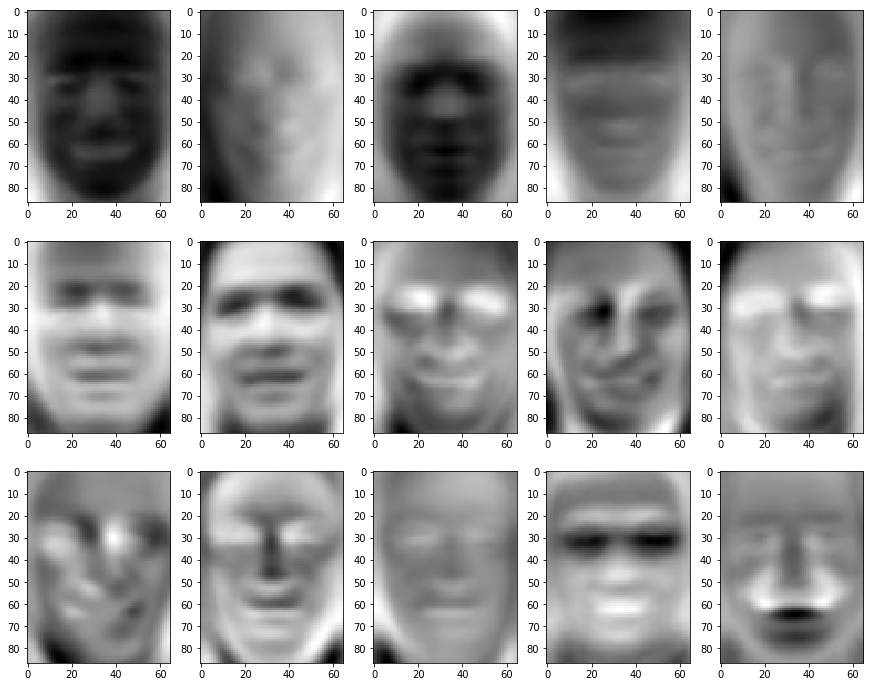

In [58]:
fig, ax = plt.subplots(3, 5, figsize=(15,12))
for y in range(3):
    for x in range(5):
        ax[y, x].imshow(img[y*5+x], cmap='gray')

In [ ]:
import mglearn
mglearn.plots.plot_pca_faces(people.dtat, )